## Which machine learning algorithms require scaling?
KNN and KMeans:- It uses Euclidean distance hence scaling all numerical features to weigh equal.

PCA:- PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.

Gradient Descent based Algorithms:- Linear regression, Logistic regression, ANN tries to converge faster with scaled features.

Naïve Bayes and LDA:- They internally handle the weightage of features so scaling may not have much effect.

Tree-Based Algorithms:- DecisionTree, RandomForest, Boosting algorithms do not use distance for their computation. Hence scaling is not required.

## What are different types of features scaling?
Standardization:- It replaces values with their z scores
Xnew=(Xold-Xmean)/𝞂

This redistributes the features to their mean=0 and standard deviation=1. Its python implementation is available on the sklearn library.

Mean Normalization:- This kind of scaling brings the distribution in the range of -1 to 1 with mean=0.
     Xnew=(x-min(x)/max(x)-min(x)

Standardization and Mean Normalization is used for algorithms that assume zero centric data like PCA.

MinMax Scaler:- This scaling technique brings the values in range 0 to 1.
Xnew=(x-min(x)/max(x)-min(x)

### Gradient Descent Based Algorithms
Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Take a look at the formula for gradient descent below:

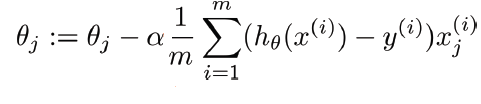

The presence of feature value X in the formula will affect the step size of the gradient descent. The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

Having features on a similar scale can help the gradient descent converge more quickly towards the minima.

### Distance-Based Algorithms
Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

herefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

### Tree-Based Algorithms
Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!

### What is Normalization?
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.



### What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.


### The Big Question – Normalize or Standardize?
Normalization vs. standardization is an eternal question among machine learning newcomers.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Feature Transformation and Scaling Techniques to Boost Your Model Performance

Feature preprocessing is one of the most crucial steps in building a Machine learning model. Too few features and your model won’t have much to learn from. Too many features and we might be feeding unnecessary information to the model. Not only this, but the values in each of the features need to be considered as well.

### Why do we need Feature Transformation and Scaling?
Oftentimes, we have datasets in which different columns have different units – like one column can be in kilograms, while another column can be in centimeters. Furthermore, we can have columns like income which can range from 20,000 to 100,000, and even more; while an age column which can range from 0 to 100(at the most). Thus, Income is about 1,000 times larger than age.

But how can we be sure that the model treats both these variables equally? When we feed these features to the model as is, there is every chance that the income will influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So, to give importance to both Age, and Income, we need feature scaling. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.DataFrame({
    'Income': [15000, 1800, 120000, 10000],
    'Age': [25, 18, 42, 51],
    'Department': ['HR','Legal','Marketing','Management']
})

In [12]:
df

,Income,Age,Department
0,15000,25,HR
1,1800,18,Legal
2,120000,42,Marketing
3,10000,51,Management


In [13]:
df_scaled = df.copy()
col_names = ['Income', 'Age']
features = df_scaled[col_names]
#We will execute this snippet before using a new scaler every time.

## MinMax Scaler
The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1. The formula for calculating the scaled value is-

x_scaled = (x – x_min)/(x_max – x_min)
Thus, a point to note is that it does so for every feature separately. Though (0, 1) is the default range, we can define our range of max and min values as well. How to implement the MinMax scaler?

In [14]:
# first import it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#apply only on the values of the features

df_scaled[col_names] = scaler.fit_transform(features.values)


In [15]:
df_scaled[col_names]

,Income,Age
0,0.111675,0.212121
1,0.000000,0.000000
2,1.000000,0.727273
3,0.069374,1.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10)) # range is from 5 to 10 here

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,5.558376,6.060606,HR
1,5.000000,5.000000,Legal
2,10.000000,8.636364,Marketing
3,5.346870,10.000000,Management


## The min-max scaler lets you set the range in which you want the variables to be.

## Standard Scaler
Just like the MinMax Scaler, the Standard Scaler is another popular scaler that is very easy to understand and implement.

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev
However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we

either choose a different scaler
or first, convert the variables to a normal distribution and then apply this scaler
Implementing the standard scaler is much similar to implementing a min-max scaler. Just like before, we will first import StandardScaler and then use it to transform our variable.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,-0.449056,-0.685248,HR
1,-0.722214,-1.218219,Legal
2,1.723796,0.609110,Marketing
3,-0.552525,1.294358,Management


In [19]:
#Let us check the mean and standard deviation of both the columns by performing a describe() function on df_scaled

df_scaled.describe()

,Income,Age
count,4.000000,4.000000e+00
mean,0.000000,-5.551115e-17
std,1.154701,1.154701e+00
min,-0.722214,-1.218219e+00
25%,-0.594947,-8.184910e-01
50%,-0.500791,-3.806935e-02
75%,0.094157,7.804217e-01
max,1.723796,1.294358e+00


## MaxAbsScaler
In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1].  To see how it works, we will add another column called ‘Balance” which contains negative values:

In [20]:
df["Balance"] = [100.0, -263.0, 2000.0, -5.0]
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125000,0.490196,HR
1,0.015000,0.352941,Legal
2,1.000000,0.823529,Marketing
3,0.083333,1.000000,Management


In [21]:
#We can confirm that the MaxAbs Scaler works as expected by printing the maximum values of each column before we scaled it:
df["Income"].max(), df["Age"].max(), df['Balance'].max()

(120000, 51, 2000.0)

## Robust Scaler
If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns. All these values are sensitive to outliers. If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

removes the median from the data
scales the data by the InterQuartile Range(IQR)

Are you familiar with the Inter-Quartile Range? It is nothing but the difference between the first and third quartile of the variable. The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

This is the default range, though we can define our own range if we want to. Now let us see how can we implement the Robust Scaler in python:

In [22]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.075075,-0.404762,HR
1,-0.321321,-0.738095,Legal
2,3.228228,0.404762,Marketing
3,-0.075075,0.833333,Management


## Transformation Techniques

## Quantile Transformer Scaler
One of the most interesting feature transformation techniques,the Quantile Transformer Scaler converts the variable distribution to a normal distribution and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

### A note to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data. Here is the code for using the Quantile Transformer:

In [23]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

C:\Users\ujwal\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Income,Age,Department
0,0.666667,0.333333,HR
1,0.000000,0.000000,Legal
2,1.000000,0.666667,Marketing
3,0.333333,1.000000,Management


## Log Transform
The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Why does it work? It is because the log function is equipped to deal with large numbers. Here is an example-

log(10) = 1

log(100) = 2, and

log(10000) = 4.

In [24]:
df['log_income'] = np.log(df['Income'])
# We created a new column to store the log values

In [25]:
df

,Income,Age,Department,Balance,log_income
0,15000,25,HR,100.0,9.615805
1,1800,18,Legal,-263.0,7.495542
2,120000,42,Marketing,2000.0,11.695247
3,10000,51,Management,-5.0,9.210340


 Wow! While our Income column had extreme values ranging from 1800 to 1,20,000 – the log values are now ranging from approximately 7.5 to 11.7! 
 
## Thus, the log operation had a dual role:

Reducing the impact of too-low values

Reducing the impact of too-high values.

### A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

Let us plot a histogram of the above, using 5 bins:

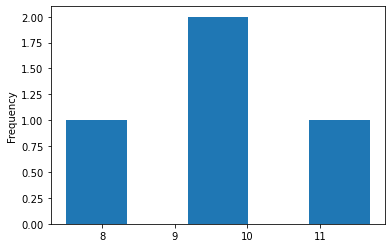

In [26]:
df['log_income'].plot.hist(bins = 5)

## Power Transformer Scaler

Often use this feature transformation technique when building a linear model. To be more specific, when dealing with heteroskedasticity. Like some other scalers above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:

1. Box-Cox transform

2. The Yeo-Johnson transform

Box-Cox works with only positive values, while Yeo-Johnson works with both positive and negative values.


In [27]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125158,-0.597385,HR
1,-1.395497,-1.301984,Legal
2,1.419403,0.681202,Marketing
3,-0.149064,1.218168,Management


## Unit Vector Scaler/Normalizer
Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1

In [28]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.999999,0.001667,HR
1,0.999950,0.010000,Legal
2,1.000000,0.000350,Marketing
3,0.999987,0.005100,Management


Thus, if you check the first row,

(.999999)^2 + (0.001667)^2 = 1.000(approx)

Similarly, you can check for all rows, and try out the above with norm = ‘l1’ as well.


## Custom Transformer
Consider this situation – Suppose you have your own Python function to transform the data. Sklearn also provides the ability to apply this transform to our dataset using what is called a FunctionTransformer.

Let us take a simple example. I have a feature transformation technique that involves taking (log to the base 2) of the values. In NumPy, there is a function called log2 which does that for us.

Thus, we can now apply the FunctionTransformer:

In [29]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log2, validate = True)

df_scaled[col_names] = transformer.transform(features.values)
df_scaled

,Income,Age,Department
0,13.872675,4.643856,HR
1,10.813781,4.169925,Legal
2,16.872675,5.392317,Marketing
3,13.287712,5.672425,Management
